# Project 5: Identify Fraud from Enron Email

### 1. Data Exploration

The goal of this project is to build a model to identify "Person of Interest" (POI) among Enron employees based on their financial and emal information. A POI is basically who actually commited fraud actions in the Enron scandal, and we are very interested in these POIs. Our dataset contains 14 financial features (e.g. salary, bonus), 6 email features (e.g. number of message sent/received), and 1 target label which shows if a person is a POI or not. Since we expect POIs might have received more money from the company or communicated with each other, we think we may be able use these features to predict the target label of POI.

Before we move to feature selection, I took a look at the data to identify outliers that we should get rid of. I found a record with much larger salary and bonus values than other records. It turns out that this record belongs to "TOTAL", which is the sum of all individual records and we should ignore in our study. This record of "TOTAL" is removed.

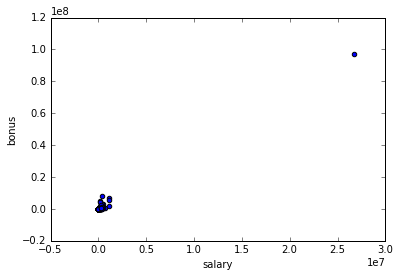

Person with salary higher than 10 million: 	TOTAL


In [27]:
import sys
import pickle
import math
from matplotlib import pyplot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data


with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

""" scatterplot salary and bonus """
for person in data_dict:
    # read salary and bonus information
    data_point = data_dict[person]
    salary = float(data_point['salary'])
    bonus = float(data_point['bonus'])
    
    # in case of nan values not showing in the plot
    if math.isnan(salary):
        salary = 0
    if math.isnan(bonus):
        bonus = 0

    pyplot.scatter( salary, bonus )

pyplot.xlabel("salary")
pyplot.ylabel("bonus")
pyplot.show()

""" find out the outlier """
for person in data_dict:
    data_point = data_dict[person]
    if float(data_point['salary']) > 10000000:
        print "Person with salary higher than 10 million: \t",person

""" remove the outlier """ 
data_dict.pop( 'TOTAL', 0 );

### 2. Feature Selection

Based on the features we have in the dataset, I go ahead and create several new features as listed below:
* ratio of emails from poi to total emails sent to this person (ratio_from_poi): from_poi_to_this_person / to_messages
* ratio of emails to poi to total emails sent from this person (ratio_to_poi): from_this_person_to_poi / from_messages
* ratio of emails shared with poi as recipients to total emails sent to this person (ratio_shared_with_poi): shared_receipt_with_poi / to_messages
* ratio of total stock value to total payments (ratio_stock_to_payments): total_stock_value / total_payments

Firstly, I created the first three ratios because they are are more meaningful than the absolute number of emails sent to or received from POIs. By plotting these new features, we can see that they could help to distinguish POIs and non-POIs. Secondly, I created the fourth ratio because POIs may have higher stock-to-payment ratio than non-POIs since this ratio is comparable between employees with higher payments and those with lower payments. However, the plot shows that this ratio is not performing well when identifying POIs.

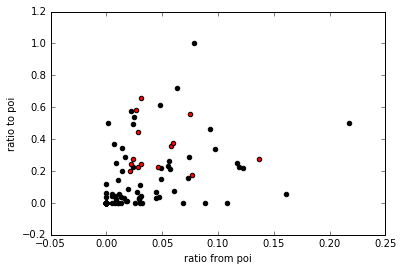

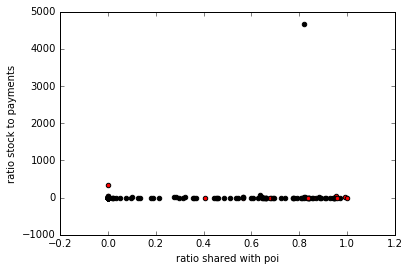

In [28]:
""" scatterplot ratio_from_poi and ratio_to_poi """
for person in data_dict:
    # read dataset information
    data_point = data_dict[person]
    
    from_poi_to_this_person = float(data_point['from_poi_to_this_person'])
    to_messages = float(data_point['to_messages'])
    
    from_this_person_to_poi = float(data_point['from_this_person_to_poi'])
    from_messages = float(data_point['from_messages'])

    # create new features
    if math.isnan(from_poi_to_this_person) or math.isnan(to_messages) or to_messages == 0:
        ratio_from_poi = 0
    else:
        ratio_from_poi = from_poi_to_this_person / to_messages
    
    if math.isnan(from_this_person_to_poi) or math.isnan(from_messages) or from_messages == 0:
        ratio_to_poi = 0
    else:
        ratio_to_poi = from_this_person_to_poi / from_messages
    
    data_point['ratio_from_poi'] = ratio_from_poi
    data_point['ratio_to_poi'] = ratio_to_poi
    
    # make plot
    if data_point['poi'] == 1:
        pyplot.scatter( ratio_from_poi, ratio_to_poi, c='r')
    else:
        pyplot.scatter( ratio_from_poi, ratio_to_poi, c='k')
        
pyplot.xlabel("ratio from poi")
pyplot.ylabel("ratio to poi")
pyplot.show()


""" scatterplot total payments and ratio_bonus """
for person in data_dict:
    # read dataset information
    data_point = data_dict[person]
    
    shared_receipt_with_poi = float(data_point['shared_receipt_with_poi'])
    to_messages = float(data_point['to_messages'])
    
    total_stock_value = float(data_point['total_stock_value'])
    total_payments = float(data_point['total_payments'])
    
    # create new features
    if math.isnan(shared_receipt_with_poi) or math.isnan(to_messages) or to_messages == 0:
        ratio_shared_with_poi = 0
    else:
        ratio_shared_with_poi = shared_receipt_with_poi / to_messages
    
    if math.isnan(total_stock_value) or math.isnan(total_payments) or total_payments == 0:
        ratio_stock_to_payments = 0
    else:
        ratio_stock_to_payments = total_stock_value / total_payments
    
    data_point['ratio_shared_with_poi'] = ratio_shared_with_poi
    data_point['ratio_stock_to_payments'] = ratio_stock_to_payments
    
    if data_point['poi'] == 1:
        pyplot.scatter( ratio_shared_with_poi, ratio_stock_to_payments, c='r')
    else:
        pyplot.scatter( ratio_shared_with_poi, ratio_stock_to_payments, c='k')
        

pyplot.xlabel("ratio shared with poi")
pyplot.ylabel("ratio stock to payments")
pyplot.show()

Before we move the the next step, I would only keep several features from all original and derived features for our study. The reason for doing so is that we don't want to overfit the model and avoid the complexity of choosing from similar features. The features I keep are salary, bonus, total_stock_value, ratio_from_poi, ratio_to_poi, and ratio_shared_with_poi. These features are scaled by the Min/Max Scaler in Sklearn.

In [48]:
features_list = ['poi','salary', 'bonus',
                 'total_payments', 'total_stock_value',
                 'ratio_from_poi', 'ratio_to_poi',
                 'ratio_shared_with_poi']
data = featureFormat(data_dict, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
min_max_scaler = preprocessing.MinMaxScaler()
features = min_max_scaler.fit_transform(features)

0.820614776302
0.0
[ 0.24744479  0.075       0.0122855   0.01673589  0.27406108  0.375       1.        ]


### 3. Algorithm Selection

### 4. Algorithm Tuning

### 5. Model Validation

### 6. Model Evaluation

146
salary 339288
to_messages 7259
deferral_payments NaN
total_payments 10425757
exercised_stock_options 4158995
bonus 8000000
restricted_stock 1008149
shared_receipt_with_poi 3962
restricted_stock_deferred NaN
total_stock_value 5167144
expenses 49537
loan_advances NaN
from_messages 2585
other 1552
from_this_person_to_poi 411
poi False
director_fees NaN
deferred_income NaN
long_term_incentive 2035380
email_address john.lavorato@enron.com
from_poi_to_this_person 528


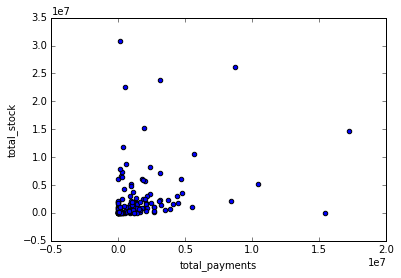

142
144


In [6]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from matplotlib import pyplot

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary', 'bonus',
                 'total_payments', 'total_stock_value',
                 'to_messages', 'from_this_person_to_poi',
                 'from_messages', 'from_poi_to_this_person',
                 'shared_receipt_with_poi']

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

print len(data_dict)
### Task 2: Remove outliers

for s in data_dict['LAVORATO JOHN J']:
    print s, data_dict['LAVORATO JOHN J'][s]
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

if 'TOTAL' in my_dataset:
    del my_dataset['TOTAL']
if 'LAY KENNETH L' in my_dataset:
    del my_dataset['LAY KENNETH L']


person_list = []
for s in my_dataset:
    person_list.append(s)
person_list.sort()
### Extract features and labels from dataset for local testing

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

%matplotlib inline
for point in data:
    total_payments = point[3]
    total_stock = point[4]
    pyplot.scatter( total_payments, total_stock )
pyplot.xlabel("total_payments")
pyplot.ylabel("total_stock")
pyplot.show()

print len(data)
print len(person_list)


### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)